In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [55]:
train_data = pd.read_csv("churn-bigml-80.csv")
test_data = pd.read_csv("churn-bigml-20.csv")

In [56]:
le = LabelEncoder()
for col in ['International plan', 'Voice mail plan']:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

In [57]:
train_data = train_data.drop(columns=['State'])
test_data = test_data.drop(columns=['State'])

In [58]:
X_train = train_data.drop(columns=['Churn'])
y_train = train_data['Churn']

In [59]:
X_test = test_data.drop(columns=['Churn'])
y_test = test_data['Churn']

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rnn = Sequential([
    SimpleRNN(32, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Dropout(0.5),  
    Dense(1, activation='sigmoid')
])

c:\Users\godsj\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:
rnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [64]:
X_train_scaled_reshaped = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_scaled_reshaped = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

In [65]:
history = rnn.fit(
    X_train_scaled_reshaped, 
    y_train, 
    epochs=100, 
    validation_split=0.2, 
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7657 - loss: 0.5714 - val_accuracy: 0.8258 - val_loss: 0.4540
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8663 - loss: 0.4127 - val_accuracy: 0.8258 - val_loss: 0.4472
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8688 - loss: 0.4102 - val_accuracy: 0.8258 - val_loss: 0.4408
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8579 - loss: 0.4149 - val_accuracy: 0.8258 - val_loss: 0.4322
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8613 - loss: 0.3993 - val_accuracy: 0.8277 - val_loss: 0.4360
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8566 - loss: 0.4032 - val_accuracy: 0.8258 - val_loss: 0.4344
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8408 - loss: 0.4311 - val_accuracy: 0.8240 - val_loss: 0.4222
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8640 - loss: 0.3755 - val_accuracy: 0.8258 - 

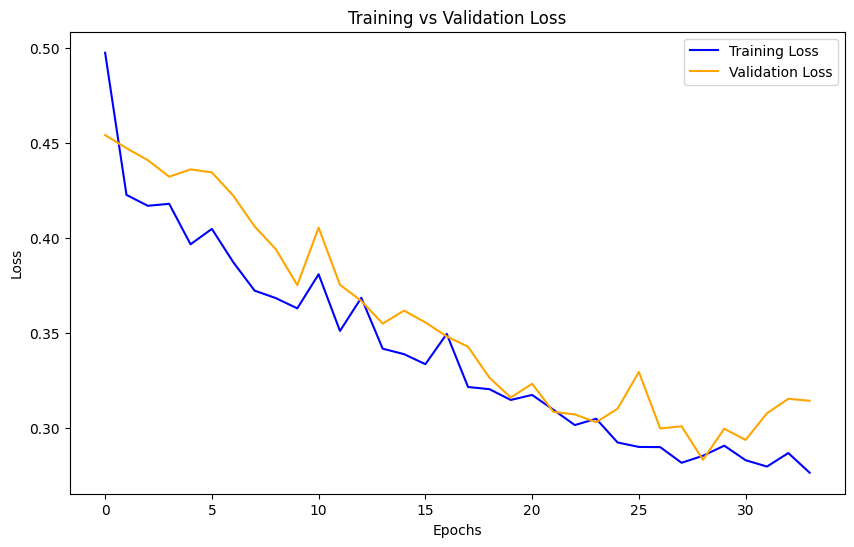

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [67]:
rnn_pred = (rnn.predict(X_test_scaled_reshaped) > 0.5).astype(int)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [68]:
rnn_results = {
    'Accuracy': accuracy_score(y_test, rnn_pred),
    'Precision': precision_score(y_test, rnn_pred),
    'Recall': recall_score(y_test, rnn_pred),
    'F1 Score': f1_score(y_test, rnn_pred),
    'ROC AUC': roc_auc_score(y_test, rnn_pred)
}

In [69]:
rnn_results_df = pd.DataFrame([rnn_results], index=['RNN'])
print("RNN 모델 평가 결과:")
print(rnn_results_df)

RNN 모델 평가 결과:
     Accuracy  Precision    Recall  F1 Score   ROC AUC
RNN  0.889055   0.672131  0.431579  0.525641  0.698307


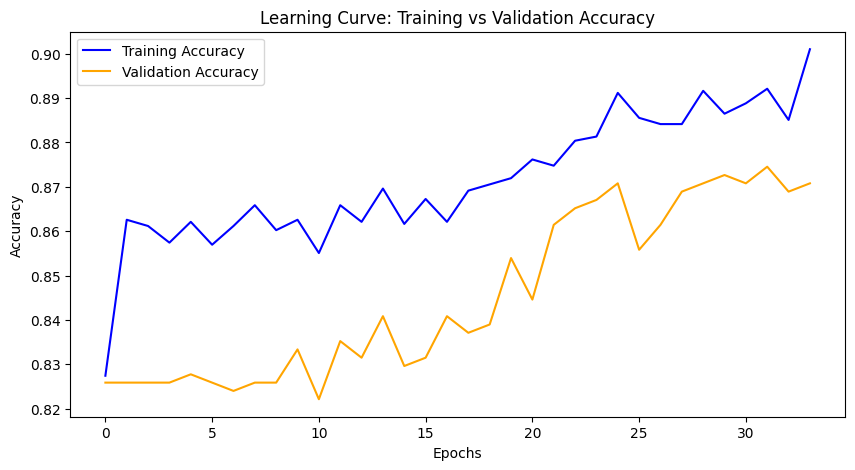

In [71]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Learning Curve: Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()